#서울시 관공서 지도에 표시하기

In [1]:
import folium
import pandas as pd

In [3]:
df=pd.read_csv('서울관공서2.csv')
df

,장소,도로명주소,위도,경도
0,서초구청,서울특별시 서초구 남부순환로 2584(서초동),37.483625,127.032683
1,강남구청,서울특별시 강남구 도곡로18길 7(도곡동),37.490901,127.038442
2,동작구청,서울특별시 동작구 장승배기로 161(노량진동),37.512528,126.939942
3,용산구청,서울특별시 용산구 백범로79길 64(청파동3가),37.541602,126.964977
4,성동구청,서울특별시 성동구 고산자로 270(행당동),37.563423,127.036965


In [6]:
map=folium.Map(location=[df.위도.mean(),df.경도.mean()],zoom_start=12)
for i in df.index:
  folium.Marker(
      location=[df.위도[i],df.경도[i]],
      popup=folium.Popup(df.도로명주소[i],max_width=200),
      tooltip=df.장소[i]).add_to(map)

title_html= '<h3 align="center style="font-size:20px>5개 공공기관</h3>'
map.get_root().html.add_child(folium.Element(title_html))

In [ ]:
map

* icon 모양을 바꿔보기

In [8]:
colors = ['red','cadetblue','blue','green','black']
icons = ['glyphicon-music','glyphicon-camera','glyphicon-star-empty','glyphicon-leaf','glyphicon-glass']

In [16]:
map=folium.Map(location=[df.위도.mean(),df.경도.mean()],zoom_start=12)
for i in df.index:
  folium.Marker(
      location=[df.위도[i],df.경도[i]],
      popup=folium.Popup(df.도로명주소[i],max_width=200),
      tooltip=df.장소[i],
      icon=folium.Icon(color=colors[i],icon=icons[i])).add_to(map)

title_html= '<h3 align="center style="font-size:20px>5개 공공기관</h3>'
map.get_root().html.add_child(folium.Element(title_html))
map


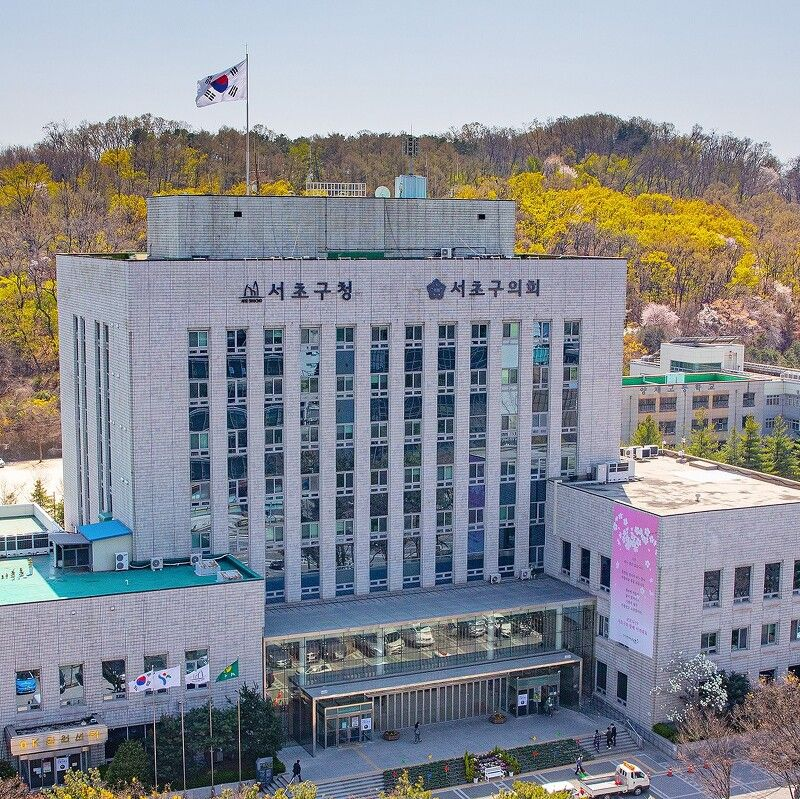

In [19]:
from folium.features import CustomIcon
map=folium.Map(location=[df.위도.mean(),df.경도.mean()],zoom_start=12)

for i in df.index:
  folium.Marker(
      location=[df.위도[i],df.경도[i]],
      popup=folium.Popup(df.도로명주소[i],max_width=200),
      tooltip=df.장소[i]).add_to(map)

folium.Marker(
    location=[df.위도[0],df.경도[0]],
    popup=folium.Popup(df.도로명주소[0],max_width=200),
    tooltip=df.장소[0],icon=CustomIcon('서초구청.jfif',icon_size=(80,80))).add_to(map)


title_html= '<h3 align="center style="font-size:20px>5개 공공기관</h3>'
map.get_root().html.add_child(folium.Element(title_html))
map

* 지도에 글자를 써보기

In [23]:
from folium.features import DivIcon

map=folium.Map(location=[df.위도.mean(),df.경도.mean()],zoom_start=12,tiles='Stamen Terrain')

folium.Marker(
    location=[df.위도[0],df.경도[0]],
    icon=DivIcon(icon_size=(80,20),icon_anchor=(0,0),html=f'<div style="font-size:20pt"><bold>지도에 글씨쓰기</bold></div>')).add_to(map)
map